In [1]:
import requests
import json
#from config import api_key
#from config import g_key
from pprint import pprint
import pandas as pd
import numpy as np
from datetime import datetime

query_tx_url="https://api.covidtracking.com/v1/states/tx/daily.csv"
query_ny_url="https://api.covidtracking.com/v1/states/ny/daily.csv"
query_all_url="https://api.covidtracking.com/v1/states/daily.csv"

fileTLM1_to_load = "Resources/Texas Labor Market CES Data.csv"
fileTLM2_to_load = "Resources/Texas Labor Market Indicators.csv"
fileTLM3_to_load = "Resources/Texas Labor Market LAUS Data.csv"

In [2]:
covid_tx_df = pd.read_csv(query_tx_url)
covid_tx_df.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200920,TX,688534,4904954.0,NaN,5593488,3081.0,NaN,1057.0,NaN,...,5593488,45,0,dda19cfcd03fde717fc7185489907e372c264b25,0,0,0,0,0,NaN
1,20200919,TX,686068,4877108.0,NaN,5563176,3124.0,NaN,1083.0,NaN,...,5563176,135,0,6abf1f916bb035d7b3b65674f2a272034880d0b7,0,0,0,0,0,NaN
2,20200918,TX,682241,4762560.0,NaN,5444801,3172.0,NaN,1107.0,NaN,...,5444801,123,0,01ae553b738298729e92c53cb9456c4aedf80ecf,0,0,0,0,0,NaN
3,20200917,TX,678819,4666357.0,NaN,5345176,3246.0,NaN,1139.0,NaN,...,5345176,112,0,9b4145f5a33cef8faf0d9de3cd4203e399202cdc,0,0,0,0,0,NaN
4,20200916,TX,674772,4624848.0,NaN,5299620,3249.0,NaN,1139.0,NaN,...,5299620,135,0,cdd3a269c4ab391d420a2edd134594145b352756,0,0,0,0,0,NaN


In [3]:
#Josh
#Find good data
valid = covid_tx_df["positive"].nunique()
total = covid_tx_df["positive"].count()

valid,total

#Needed Data
sept_20_tx_df = covid_tx_df[["date", "positive", "negative"]]
sept_texas_per = covid_tx_df["positive"]/(covid_tx_df["positive"] + covid_tx_df["negative"])

sept_20_tx_df["% Pos"] = sept_texas_per

#May need to extract day, month, year into separate 
#and format data so that all df's match
#analysis_df.style.format({"date":"{}",
                          #"negative":"{:,.0f}",
                         #"% Pos", "{:.1f}%""})


sept_20_tx_df.head()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,date,positive,negative,% Pos
0,20200920,688534,4904954.0,0.123096
1,20200919,686068,4877108.0,0.123323
2,20200918,682241,4762560.0,0.125301
3,20200917,678819,4666357.0,0.126997
4,20200916,674772,4624848.0,0.127325


In [4]:
# Find null values
sept_20_tx_df.isnull().any(axis=1)

#Drop all null values and create a clean dataframe
sept_20_tx_df = sept_20_tx_df.dropna(how="any")
sept_20_tx_df.head()


#Use this to compare %pos by date or to verify an event by date

,date,positive,negative,% Pos
0,20200920,688534,4904954.0,0.123096
1,20200919,686068,4877108.0,0.123323
2,20200918,682241,4762560.0,0.125301
3,20200917,678819,4666357.0,0.126997
4,20200916,674772,4624848.0,0.127325


In [5]:
TLM1_data = pd.read_csv(fileTLM1_to_load)
TLM1_data.head()

,Industry,20-Jul,20-Jun,19-Jul,Monthly Change,Monthly % Change,Annual Change,Annual\n% Change,Unnamed: 8
0,TOTAL NONFARM,"12,087,800","12,145,700","12,765,800","-57,900",-0.50%,"-678,000",-5.30%,NaN
1,TOTAL PRIVATE,"10,231,200","10,254,600","10,865,900","-23,400",-0.20%,"-634,700",-5.80%,NaN
2,GOODS PRODUCING,"1,807,600","1,815,800","1,942,200","-8,200",-0.50%,"-134,600",-6.90%,NaN
3,"Mining and Logging (NAICS 21, 1133)","191,500","192,700","250,700","-1,200",-0.60%,"-59,200",-23.60%,NaN
4,Oil and Gas Extraction (NAICS 211),"70,500","69,300","77,800","1,200",1.70%,"-7,300",-9.40%,NaN


In [6]:
TLM2_data = pd.read_csv(fileTLM2_to_load)
TLM2_data.head()

,Date,Texas,U.S.,Unnamed: 3,Unnamed: 4
0,10-Jan,$21.31,$22.51,NaN,NaN
1,10-Feb,$21.41,$22.57,NaN,NaN
2,10-Mar,$21.31,$22.48,NaN,NaN
3,10-Apr,$21.42,$22.53,NaN,NaN
4,10-May,$21.39,$22.60,NaN,NaN


In [7]:
TLM3_data = pd.read_csv(fileTLM3_to_load)
TLM3_data.head()

,Metro Areas,Civilian Labor Force\nJuly\n2020,Employed\nJuly\n2020,Unemployed\nJuly\n2020,Rate\nJuly\n2020,Civilian Labor Force\nJune\n2020,Employed\nJune\n2020,Unemployed\nJune\n2020,Rate\nJune\n2020,Civilian Labor Force July\n2019,Employed\nJuly\n2019,Unemployed\nJuly\n2019,Rate\nJuly\n2019,Unnamed: 13,Unnamed: 14
0,United States,"161,374,000","144,492,000","16,882,000",10.5,"160,883,000","142,811,000","18,072,000",11.2,"164,941,000","158,385,000","6,556,000",4.0,NaN,NaN
1,Texas,"13,846,028","12,705,927","1,140,101",8.2,"13,804,456","12,606,499","1,197,957",8.7,"14,064,960","13,524,473","540,487",3.8,NaN,NaN
2,Abilene,"77,159","72,572","4,587",5.9,"76,433","71,618","4,815",6.3,"78,826","76,205","2,621",3.3,NaN,NaN
3,Amarillo,"125,356","118,920","6,436",5.1,"125,167","117,796","7,371",5.9,"132,139","128,314","3,825",2.9,NaN,NaN
4,Austin-Round Rock,"1,225,085","1,143,143","81,942",6.7,"1,215,025","1,126,397","88,628",7.3,"1,240,719","1,204,386","36,333",2.9,NaN,NaN


In [8]:
covid_ny_df = pd.read_csv(query_ny_url)
covid_ny_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200920,NY,449900,9472546,NaN,9922446,468.0,89995.0,132.0,NaN,...,9922446,2,0,b9792dc99d6549db085101b4cec82e1ef562405f,0,0,0,0,0,NaN
1,20200919,NY,449038,9373053,NaN,9822091,467.0,89995.0,144.0,NaN,...,9822091,2,0,6428fa42a0444dfe549a7a14c8e0e10ffbb91404,0,0,0,0,0,NaN
2,20200918,NY,448052,9263595,NaN,9711647,478.0,89995.0,141.0,NaN,...,9711647,10,0,484099c5cadb392fbd9a1cdd91d0dfbb3d880cf9,0,0,0,0,0,NaN
3,20200917,NY,447262,9174658,NaN,9621920,486.0,89995.0,135.0,NaN,...,9621920,3,0,5e44bc2c7424a256603012991c84a330c2f41244,0,0,0,0,0,NaN
4,20200916,NY,446366,9084050,NaN,9530416,483.0,89995.0,138.0,NaN,...,9530416,5,0,247d677a0fea26706b310e8053dd5198afd55927,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,20200308,NY,105,92,NaN,197,NaN,NaN,NaN,NaN,...,197,0,0,8b4ccf56cc9ddfaacef5d4e42a99d94dfee8af12,0,0,0,0,0,NaN
197,20200307,NY,76,92,236.0,168,NaN,NaN,NaN,NaN,...,168,0,0,5c70fd54b6db8b216a2cbb0636071acd6a1517ca,0,0,0,0,0,NaN
198,20200306,NY,33,92,236.0,125,NaN,NaN,NaN,NaN,...,125,0,0,d6fb329fc7e2f5a6593ed3c3f4cdf8302dd618e0,0,0,0,0,0,NaN
199,20200305,NY,22,76,24.0,98,NaN,NaN,NaN,NaN,...,98,0,0,4e6700472deb64bcf0ae6c56393e0cb700af0510,0,0,0,0,0,NaN


In [9]:
covid_all_df = pd.read_csv(query_all_url)
covid_all_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200920,AK,7767.0,419158.0,NaN,426925.0,43.0,NaN,NaN,NaN,...,426925,0,0,d939ccbfc0a45044ede4b81384f1a41520b50f87,0,0,0,0,0,NaN
1,20200920,AL,144962.0,923366.0,NaN,1054017.0,780.0,16227.0,NaN,1643.0,...,1068328,0,0,1068eacf936cf84dc1349d453d2454fa7e85ffa1,0,0,0,0,0,NaN
2,20200920,AR,75723.0,810294.0,NaN,883984.0,404.0,4967.0,212.0,NaN,...,886017,8,4,7ae6e9d3ea3d6cd32353b9b22df4862a9d40f1e0,0,0,0,0,0,NaN
3,20200920,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,...,1571,0,0,3e8d4473820fe86e6e0d374bbcf084d1a4283566,0,0,0,0,0,NaN
4,20200920,AZ,214018.0,1169906.0,NaN,1383924.0,472.0,21876.0,120.0,NaN,...,1383924,9,-6,7389ef357a7c4b8e64ccabb01a376c6e67e87d75,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11237,20200124,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,91ed2b32e5ff5acb216ea86f7f5ef0025b379333,0,0,0,0,0,NaN
11238,20200123,MA,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
11239,20200123,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,85ec142b4c54b40a2188c02b3c028e42052b1c45,0,0,0,0,0,NaN
11240,20200122,MA,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,0,0,0,0f3eebd5c4a00d0aaa235b0534bd4243794652b6,0,0,0,0,0,NaN


In [10]:
covid_tx_df['date'] = pd.to_datetime(covid_tx_df['date'], format='%Y%m%d')
covid_ny_df['date'] = pd.to_datetime(covid_ny_df['date'], format='%Y%m%d')
covid_all_df['date'] = pd.to_datetime(covid_all_df['date'], format='%Y%m%d')

In [11]:
covid_tx_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-20,TX,688534,4904954.0,NaN,5593488,3081.0,NaN,1057.0,NaN,...,5593488,45,0,dda19cfcd03fde717fc7185489907e372c264b25,0,0,0,0,0,NaN
1,2020-09-19,TX,686068,4877108.0,NaN,5563176,3124.0,NaN,1083.0,NaN,...,5563176,135,0,6abf1f916bb035d7b3b65674f2a272034880d0b7,0,0,0,0,0,NaN
2,2020-09-18,TX,682241,4762560.0,NaN,5444801,3172.0,NaN,1107.0,NaN,...,5444801,123,0,01ae553b738298729e92c53cb9456c4aedf80ecf,0,0,0,0,0,NaN
3,2020-09-17,TX,678819,4666357.0,NaN,5345176,3246.0,NaN,1139.0,NaN,...,5345176,112,0,9b4145f5a33cef8faf0d9de3cd4203e399202cdc,0,0,0,0,0,NaN
4,2020-09-16,TX,674772,4624848.0,NaN,5299620,3249.0,NaN,1139.0,NaN,...,5299620,135,0,cdd3a269c4ab391d420a2edd134594145b352756,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2020-03-08,TX,8,NaN,NaN,8,NaN,NaN,NaN,NaN,...,8,0,0,f94e478683fbfcc8099c8c30041dbacebf8d9550,0,0,0,0,0,NaN
197,2020-03-07,TX,8,NaN,NaN,8,NaN,NaN,NaN,NaN,...,8,0,0,8879e97aec342418e578906886082ae70c76bed1,0,0,0,0,0,NaN
198,2020-03-06,TX,5,NaN,NaN,5,NaN,NaN,NaN,NaN,...,5,0,0,2e9ea0bb353851b7cc519c04dfb73aaa9b780b2e,0,0,0,0,0,NaN
199,2020-03-05,TX,1,NaN,NaN,1,NaN,NaN,NaN,NaN,...,1,0,0,b6c2d2da54bf32da455dc064c25b46362e2c5249,0,0,0,0,0,NaN


In [12]:
covid_ny_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-20,NY,449900,9472546,NaN,9922446,468.0,89995.0,132.0,NaN,...,9922446,2,0,b9792dc99d6549db085101b4cec82e1ef562405f,0,0,0,0,0,NaN
1,2020-09-19,NY,449038,9373053,NaN,9822091,467.0,89995.0,144.0,NaN,...,9822091,2,0,6428fa42a0444dfe549a7a14c8e0e10ffbb91404,0,0,0,0,0,NaN
2,2020-09-18,NY,448052,9263595,NaN,9711647,478.0,89995.0,141.0,NaN,...,9711647,10,0,484099c5cadb392fbd9a1cdd91d0dfbb3d880cf9,0,0,0,0,0,NaN
3,2020-09-17,NY,447262,9174658,NaN,9621920,486.0,89995.0,135.0,NaN,...,9621920,3,0,5e44bc2c7424a256603012991c84a330c2f41244,0,0,0,0,0,NaN
4,2020-09-16,NY,446366,9084050,NaN,9530416,483.0,89995.0,138.0,NaN,...,9530416,5,0,247d677a0fea26706b310e8053dd5198afd55927,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2020-03-08,NY,105,92,NaN,197,NaN,NaN,NaN,NaN,...,197,0,0,8b4ccf56cc9ddfaacef5d4e42a99d94dfee8af12,0,0,0,0,0,NaN
197,2020-03-07,NY,76,92,236.0,168,NaN,NaN,NaN,NaN,...,168,0,0,5c70fd54b6db8b216a2cbb0636071acd6a1517ca,0,0,0,0,0,NaN
198,2020-03-06,NY,33,92,236.0,125,NaN,NaN,NaN,NaN,...,125,0,0,d6fb329fc7e2f5a6593ed3c3f4cdf8302dd618e0,0,0,0,0,0,NaN
199,2020-03-05,NY,22,76,24.0,98,NaN,NaN,NaN,NaN,...,98,0,0,4e6700472deb64bcf0ae6c56393e0cb700af0510,0,0,0,0,0,NaN


In [13]:
covid_all_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-20,AK,7767.0,419158.0,NaN,426925.0,43.0,NaN,NaN,NaN,...,426925,0,0,d939ccbfc0a45044ede4b81384f1a41520b50f87,0,0,0,0,0,NaN
1,2020-09-20,AL,144962.0,923366.0,NaN,1054017.0,780.0,16227.0,NaN,1643.0,...,1068328,0,0,1068eacf936cf84dc1349d453d2454fa7e85ffa1,0,0,0,0,0,NaN
2,2020-09-20,AR,75723.0,810294.0,NaN,883984.0,404.0,4967.0,212.0,NaN,...,886017,8,4,7ae6e9d3ea3d6cd32353b9b22df4862a9d40f1e0,0,0,0,0,0,NaN
3,2020-09-20,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,...,1571,0,0,3e8d4473820fe86e6e0d374bbcf084d1a4283566,0,0,0,0,0,NaN
4,2020-09-20,AZ,214018.0,1169906.0,NaN,1383924.0,472.0,21876.0,120.0,NaN,...,1383924,9,-6,7389ef357a7c4b8e64ccabb01a376c6e67e87d75,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11237,2020-01-24,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,91ed2b32e5ff5acb216ea86f7f5ef0025b379333,0,0,0,0,0,NaN
11238,2020-01-23,MA,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
11239,2020-01-23,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,85ec142b4c54b40a2188c02b3c028e42052b1c45,0,0,0,0,0,NaN
11240,2020-01-22,MA,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,0,0,0,0f3eebd5c4a00d0aaa235b0534bd4243794652b6,0,0,0,0,0,NaN


In [14]:
covid_tx_df.set_index('date')

,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-09-20,TX,688534,4904954.0,NaN,5593488,3081.0,NaN,1057.0,NaN,NaN,...,5593488,45,0,dda19cfcd03fde717fc7185489907e372c264b25,0,0,0,0,0,NaN
2020-09-19,TX,686068,4877108.0,NaN,5563176,3124.0,NaN,1083.0,NaN,NaN,...,5563176,135,0,6abf1f916bb035d7b3b65674f2a272034880d0b7,0,0,0,0,0,NaN
2020-09-18,TX,682241,4762560.0,NaN,5444801,3172.0,NaN,1107.0,NaN,NaN,...,5444801,123,0,01ae553b738298729e92c53cb9456c4aedf80ecf,0,0,0,0,0,NaN
2020-09-17,TX,678819,4666357.0,NaN,5345176,3246.0,NaN,1139.0,NaN,NaN,...,5345176,112,0,9b4145f5a33cef8faf0d9de3cd4203e399202cdc,0,0,0,0,0,NaN
2020-09-16,TX,674772,4624848.0,NaN,5299620,3249.0,NaN,1139.0,NaN,NaN,...,5299620,135,0,cdd3a269c4ab391d420a2edd134594145b352756,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,TX,8,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,...,8,0,0,f94e478683fbfcc8099c8c30041dbacebf8d9550,0,0,0,0,0,NaN
2020-03-07,TX,8,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,...,8,0,0,8879e97aec342418e578906886082ae70c76bed1,0,0,0,0,0,NaN
2020-03-06,TX,5,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,5,0,0,2e9ea0bb353851b7cc519c04dfb73aaa9b780b2e,0,0,0,0,0,NaN


In [15]:
covid_ny_df.set_index('date')

,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-09-20,NY,449900,9472546,NaN,9922446,468.0,89995.0,132.0,NaN,60.0,...,9922446,2,0,b9792dc99d6549db085101b4cec82e1ef562405f,0,0,0,0,0,NaN
2020-09-19,NY,449038,9373053,NaN,9822091,467.0,89995.0,144.0,NaN,60.0,...,9822091,2,0,6428fa42a0444dfe549a7a14c8e0e10ffbb91404,0,0,0,0,0,NaN
2020-09-18,NY,448052,9263595,NaN,9711647,478.0,89995.0,141.0,NaN,62.0,...,9711647,10,0,484099c5cadb392fbd9a1cdd91d0dfbb3d880cf9,0,0,0,0,0,NaN
2020-09-17,NY,447262,9174658,NaN,9621920,486.0,89995.0,135.0,NaN,68.0,...,9621920,3,0,5e44bc2c7424a256603012991c84a330c2f41244,0,0,0,0,0,NaN
2020-09-16,NY,446366,9084050,NaN,9530416,483.0,89995.0,138.0,NaN,67.0,...,9530416,5,0,247d677a0fea26706b310e8053dd5198afd55927,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,NY,105,92,NaN,197,NaN,NaN,NaN,NaN,NaN,...,197,0,0,8b4ccf56cc9ddfaacef5d4e42a99d94dfee8af12,0,0,0,0,0,NaN
2020-03-07,NY,76,92,236.0,168,NaN,NaN,NaN,NaN,NaN,...,168,0,0,5c70fd54b6db8b216a2cbb0636071acd6a1517ca,0,0,0,0,0,NaN
2020-03-06,NY,33,92,236.0,125,NaN,NaN,NaN,NaN,NaN,...,125,0,0,d6fb329fc7e2f5a6593ed3c3f4cdf8302dd618e0,0,0,0,0,0,NaN


In [16]:
covid_all_df.set_index('date')

,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-09-20,AK,7767.0,419158.0,NaN,426925.0,43.0,NaN,NaN,NaN,13.0,...,426925,0,0,d939ccbfc0a45044ede4b81384f1a41520b50f87,0,0,0,0,0,NaN
2020-09-20,AL,144962.0,923366.0,NaN,1054017.0,780.0,16227.0,NaN,1643.0,NaN,...,1068328,0,0,1068eacf936cf84dc1349d453d2454fa7e85ffa1,0,0,0,0,0,NaN
2020-09-20,AR,75723.0,810294.0,NaN,883984.0,404.0,4967.0,212.0,NaN,83.0,...,886017,8,4,7ae6e9d3ea3d6cd32353b9b22df4862a9d40f1e0,0,0,0,0,0,NaN
2020-09-20,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,NaN,...,1571,0,0,3e8d4473820fe86e6e0d374bbcf084d1a4283566,0,0,0,0,0,NaN
2020-09-20,AZ,214018.0,1169906.0,NaN,1383924.0,472.0,21876.0,120.0,NaN,57.0,...,1383924,9,-6,7389ef357a7c4b8e64ccabb01a376c6e67e87d75,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-24,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,91ed2b32e5ff5acb216ea86f7f5ef0025b379333,0,0,0,0,0,NaN
2020-01-23,MA,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
2020-01-23,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,85ec142b4c54b40a2188c02b3c028e42052b1c45,0,0,0,0,0,NaN


In [17]:
import matplotlib.pyplot as plt
import os
import csv

results_path = os.path.join("Resources", "monthly_data.csv")
results_df = pd.read_csv(results_path)
results_df.head()

,Month,Year,Total,Positive,% Pos
0,April,2020,990,75,13.2
1,May,2020,2112,136,15.5
2,June,2020,4912,1105,4.4
3,July,2020,7111,1777,4.0
4,August,2020,4117,409,10.1


In [18]:
gender_path = os.path.join("Output_data", "gender.csv")
gender_df = pd.read_csv(gender_path)
gender_df.head()

,Month,% Men Unemployed,% Women Unemployed
0,March,4.0,4.0
1,April,13.0,15.5
2,May,11.6,13.9
3,June,10.2,11.2
4,July,9.4,10.5


In [19]:
combined_data = pd.merge(results_df, gender_df, on="Month")
combined_data["% Women Unemployed"] = combined_data["% Women Unemployed"].astype(str).astype(float)
combined_data.dtypes

combined_data["% Men Unemployed"] = combined_data["% Men Unemployed"].astype(str).astype(float)
combined_data.dtypes

Month                  object
Year                    int64
Total                   int64
Positive                int64
% Pos                 float64
% Men Unemployed      float64
% Women Unemployed    float64
dtype: object

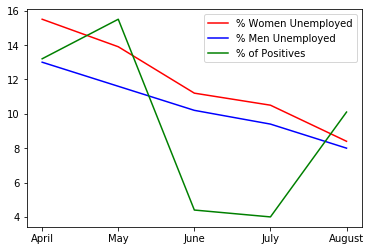

In [20]:
percent_women = combined_data["% Women Unemployed"]
percent_men = combined_data["% Men Unemployed"]
months = combined_data["Month"]
pos_perc = combined_data["% Pos"]

women_perc = plt.plot(months, percent_women, color="red")
men_perc = plt.plot(months, percent_men, color="blue")
pos = plt.plot(months, pos_perc, color="green")
plt.legend(handles=[women_perc[0], men_perc[0], pos[0]], labels=["% Women Unemployed", "% Men Unemployed", "% of Positives"], loc="best")
plt.show()

In [21]:
clean_tx = covid_tx_df[["date", "state", "totalTestResults", "positive", "negative", "recovered", "death"]]
clean_tx.head()

,date,state,totalTestResults,positive,negative,recovered,death
0,2020-09-20,TX,5593488,688534,4904954.0,609210.0,14893.0
1,2020-09-19,TX,5563176,686068,4877108.0,605522.0,14848.0
2,2020-09-18,TX,5444801,682241,4762560.0,600662.0,14713.0
3,2020-09-17,TX,5345176,678819,4666357.0,594817.0,14590.0
4,2020-09-16,TX,5299620,674772,4624848.0,590837.0,14478.0


In [22]:
clean_ny = covid_ny_df[["date", "state", "totalTestResults", "positive", "negative", "recovered", "death"]]
clean_ny.head()

,date,state,totalTestResults,positive,negative,recovered,death
0,2020-09-20,NY,9922446,449900,9472546,76179.0,25427.0
1,2020-09-19,NY,9822091,449038,9373053,76101.0,25425.0
2,2020-09-18,NY,9711647,448052,9263595,76036.0,25423.0
3,2020-09-17,NY,9621920,447262,9174658,75962.0,25413.0
4,2020-09-16,NY,9530416,446366,9084050,75903.0,25410.0


In [23]:
clean_all = covid_all_df[["date", "state", "totalTestResults", "positive", "negative", "recovered", "death"]]
clean_all.head()

,date,state,totalTestResults,positive,negative,recovered,death
0,2020-09-20,AK,426925.0,7767.0,419158.0,2438.0,45.0
1,2020-09-20,AL,1054017.0,144962.0,923366.0,61232.0,2437.0
2,2020-09-20,AR,883984.0,75723.0,810294.0,67853.0,1181.0
3,2020-09-20,AS,1571.0,0.0,1571.0,NaN,0.0
4,2020-09-20,AZ,1383924.0,214018.0,1169906.0,33835.0,5476.0


In [24]:
ny_path = os.path.join("Output_data", "NY_Total_Claims.csv")
ny_df = pd.read_csv(ny_path)
ny_df.head()

,0
0,August2020
1,July2020
2,June2020
3,May2020
4,April2020


In [25]:
plt.figure(figsize=(10,5))
plt.scatter(results_df["Positive"], percent_women["% Women Unemployed"])
plt.title("Texas Adolescent Positives  vs. Texas Women Unemployement")
plt.xlabel("% Pos")
plt.ylabel("Unemployement")

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 720x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(results_df["Positive"], gender_limited["% Men Unemployed"])
plt.title("Texas Adolescent Positives  vs. Texas Men Unemployement")
plt.xlabel("% Pos")
plt.ylabel("Unemployement")